(186, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                186 non-null    object 
 1   tag                  186 non-null    object 
 2   artist               186 non-null    object 
 3   year                 186 non-null    int64  
 4   views                186 non-null    int64  
 5   features             186 non-null    object 
 6   lyrics               186 non-null    object 
 7   id                   186 non-null    int64  
 8   language_cld3        186 non-null    object 
 9   language_ft          186 non-null    object 
 10  language             186 non-null    object 
 11  region_group         186 non-null    object 
 12  join_key             186 non-null    object 
 13  popularity           186 non-null    int64  
 14  duration_ms          186 non-null    int64  
 15  acousticness         186 non-n

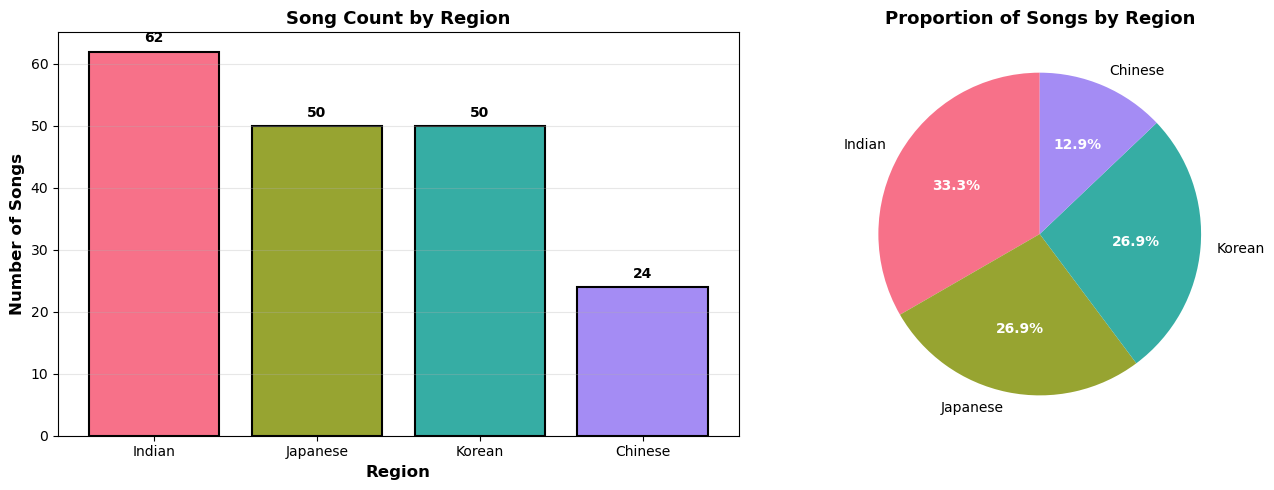

2. DURATION ANALYSIS

Duration statistics by region:
              count    mean     std     min     25%     50%     75%     max
region_group                                                               
Chinese        24.0  223.33   59.88  104.24  179.59  232.90  254.29  328.70
Indian         62.0  251.02  109.52  153.08  193.47  229.91  277.07  980.08
Japanese       50.0  262.46   52.52  155.91  229.03  257.69  299.57  407.60
Korean         50.0  218.13   33.16  121.77  197.00  216.73  237.88  294.46

ANOVA: F=3.7994, p=0.011271
Significant: YES ✓


<positron-console-cell-10>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



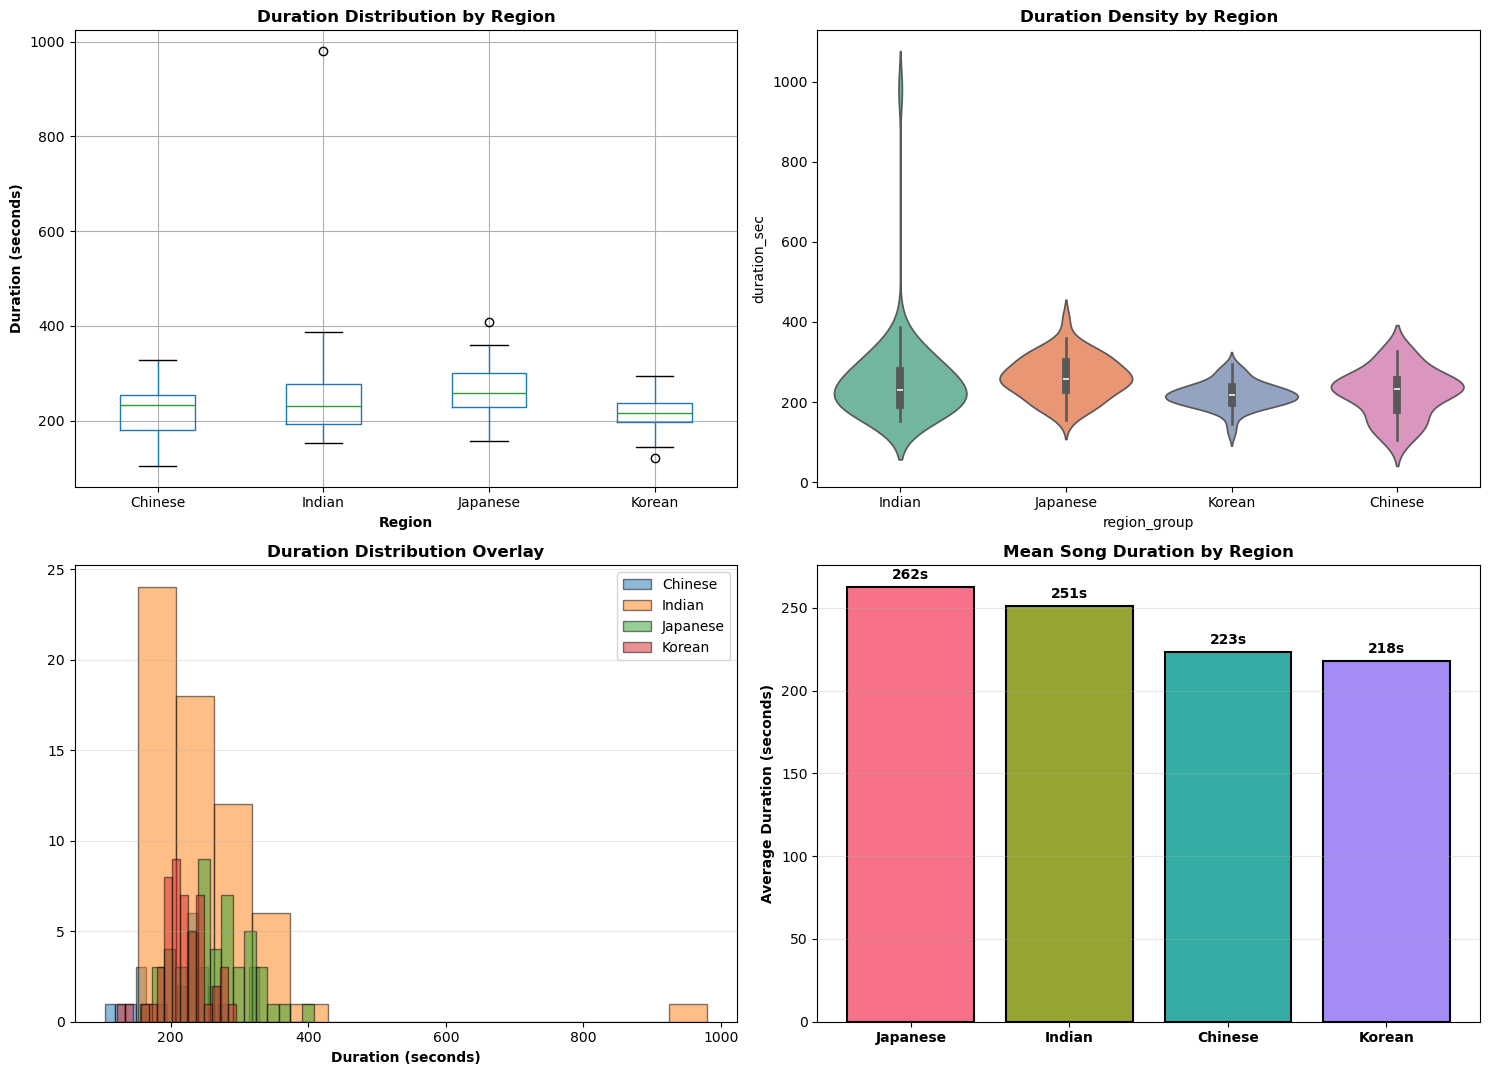

3. AUDIO FEATURES

Mean audio features by region:
              acousticness  energy  danceability  ...  speechiness    tempo  valence
region_group                                      ...                               
Chinese              0.590   0.499         0.547  ...        0.050  122.146    0.423
Indian               0.362   0.616         0.620  ...        0.082  114.245    0.467
Japanese             0.098   0.823         0.503  ...        0.080  131.497    0.493
Korean               0.156   0.736         0.631  ...        0.102  131.501    0.476

[4 rows x 9 columns]


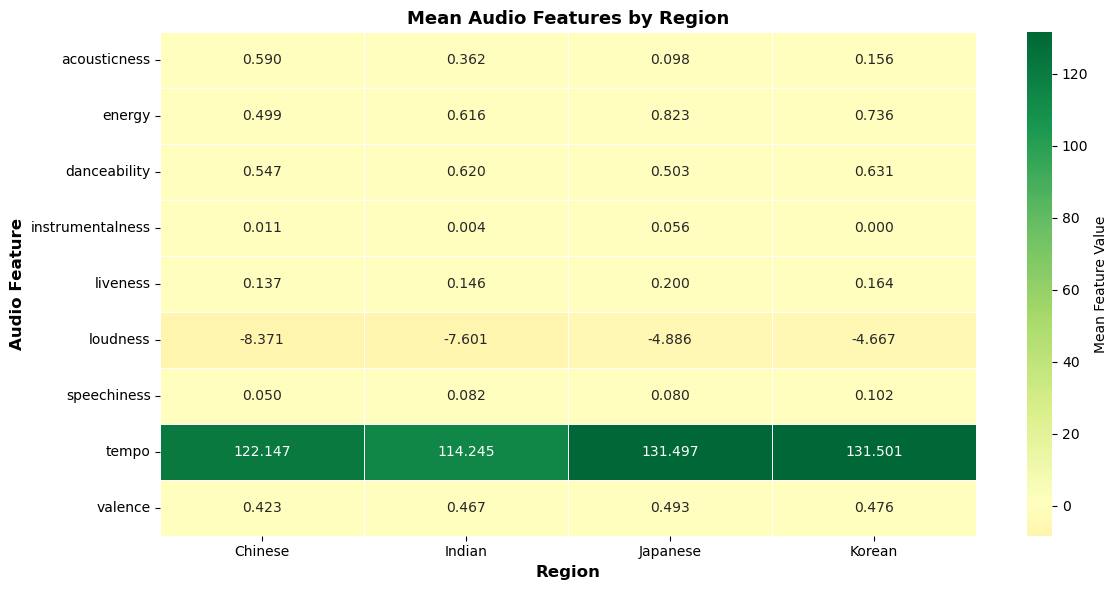

4. LANGUAGE DISTRIBUTION

Language by region:
language      bn  hi  ja  ko  ml  pa  ta  zh
region_group                                
Chinese        0   0   0   0   0   0   0  24
Indian         3  50   0   0   1   7   1   0
Japanese       0   0  50   0   0   0   0   0
Korean         0   0   0  50   0   0   0   0


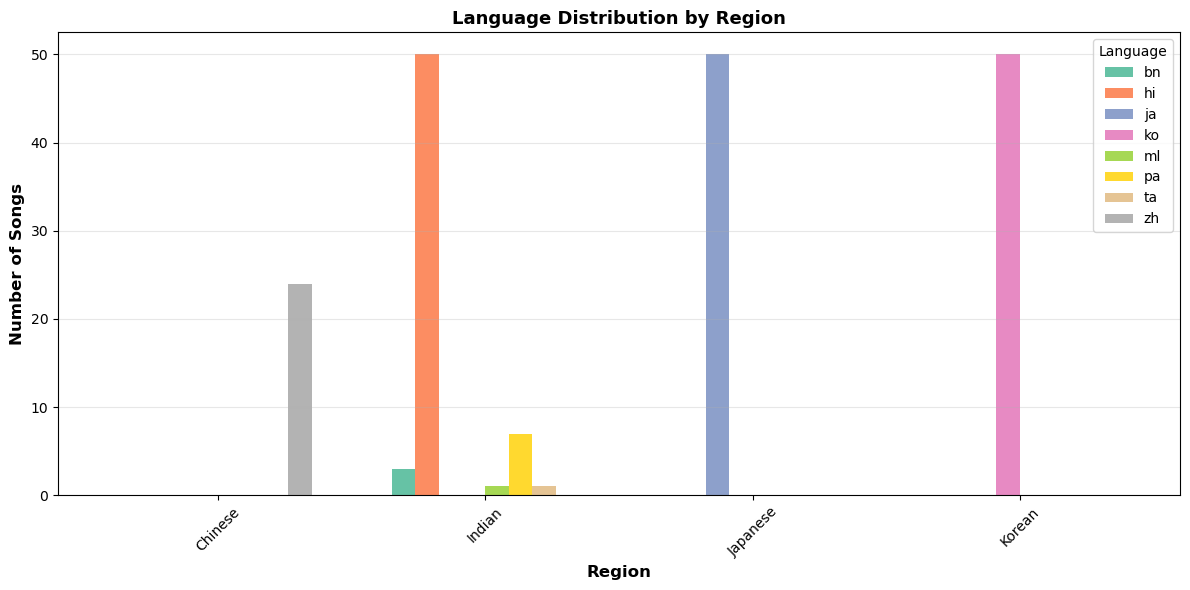


5. TAG DISTRIBUTION BY REGION

Top 5 tags by region:

Chinese:
tag
pop    22
rb      2
Name: count, dtype: int64

Indian:
tag
pop        40
rap         8
rock        7
rb          6
country     1
Name: count, dtype: int64

Japanese:
tag
pop     42
rock     8
Name: count, dtype: int64

Korean:
tag
pop     39
rb       5
rap      5
rock     1
Name: count, dtype: int64
 Saved: 05_tag_by_region.png


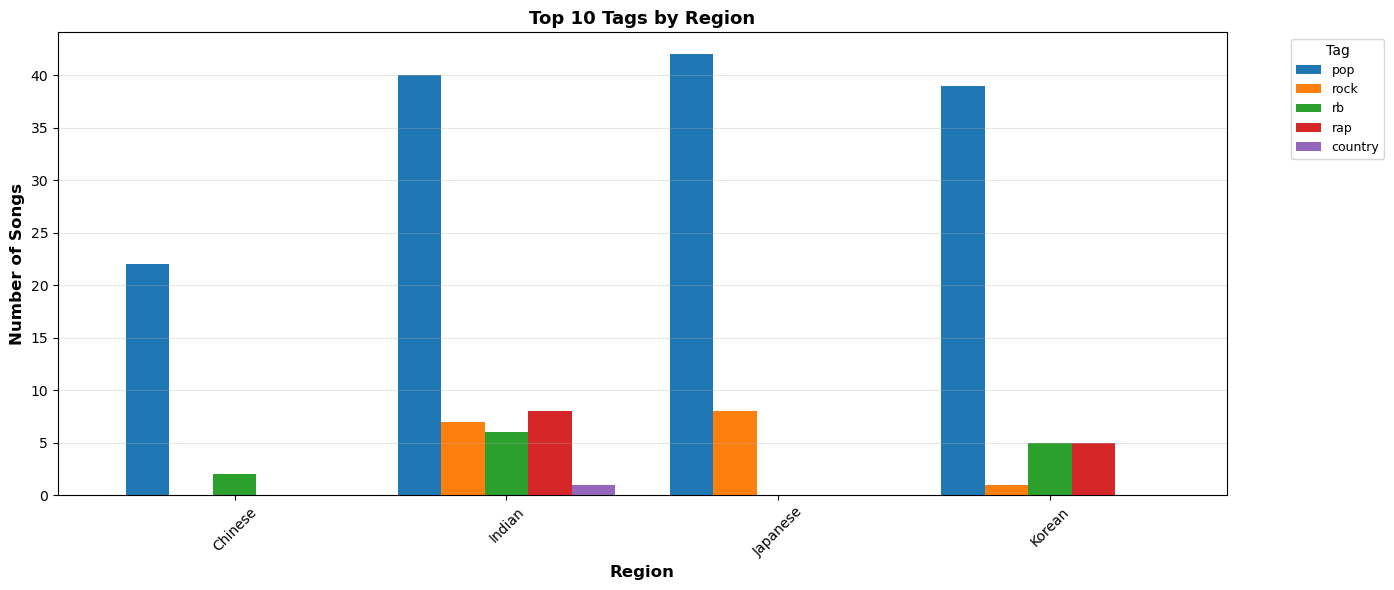

6. SENTIMENT POLARITY ANALYSIS

Sentiment columns found: ['sentiment_polarity\r', 'sentiment_polarity']
'

Cleaning sentiment column...
✓ Cleaned. Non-null values: 186 / 186

Sentiment polarity statistics by region:
              count   mean    std    min    25%    50%    75%    max
region_group                                                        
Chinese        24.0  0.122  0.254 -0.185  0.000  0.000  0.186  1.000
Indian         62.0  0.065  0.202 -0.477 -0.051  0.037  0.155  0.740
Japanese       50.0  0.137  0.139 -0.246  0.048  0.127  0.212  0.490
Korean         50.0  0.073  0.142 -0.262 -0.027  0.054  0.142  0.382

ANOVA for sentiment: F=1.8904, p=0.132791
Significant: NO


<positron-console-cell-10>:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



✓ Saved: 06_sentiment_polarity_by_region.png


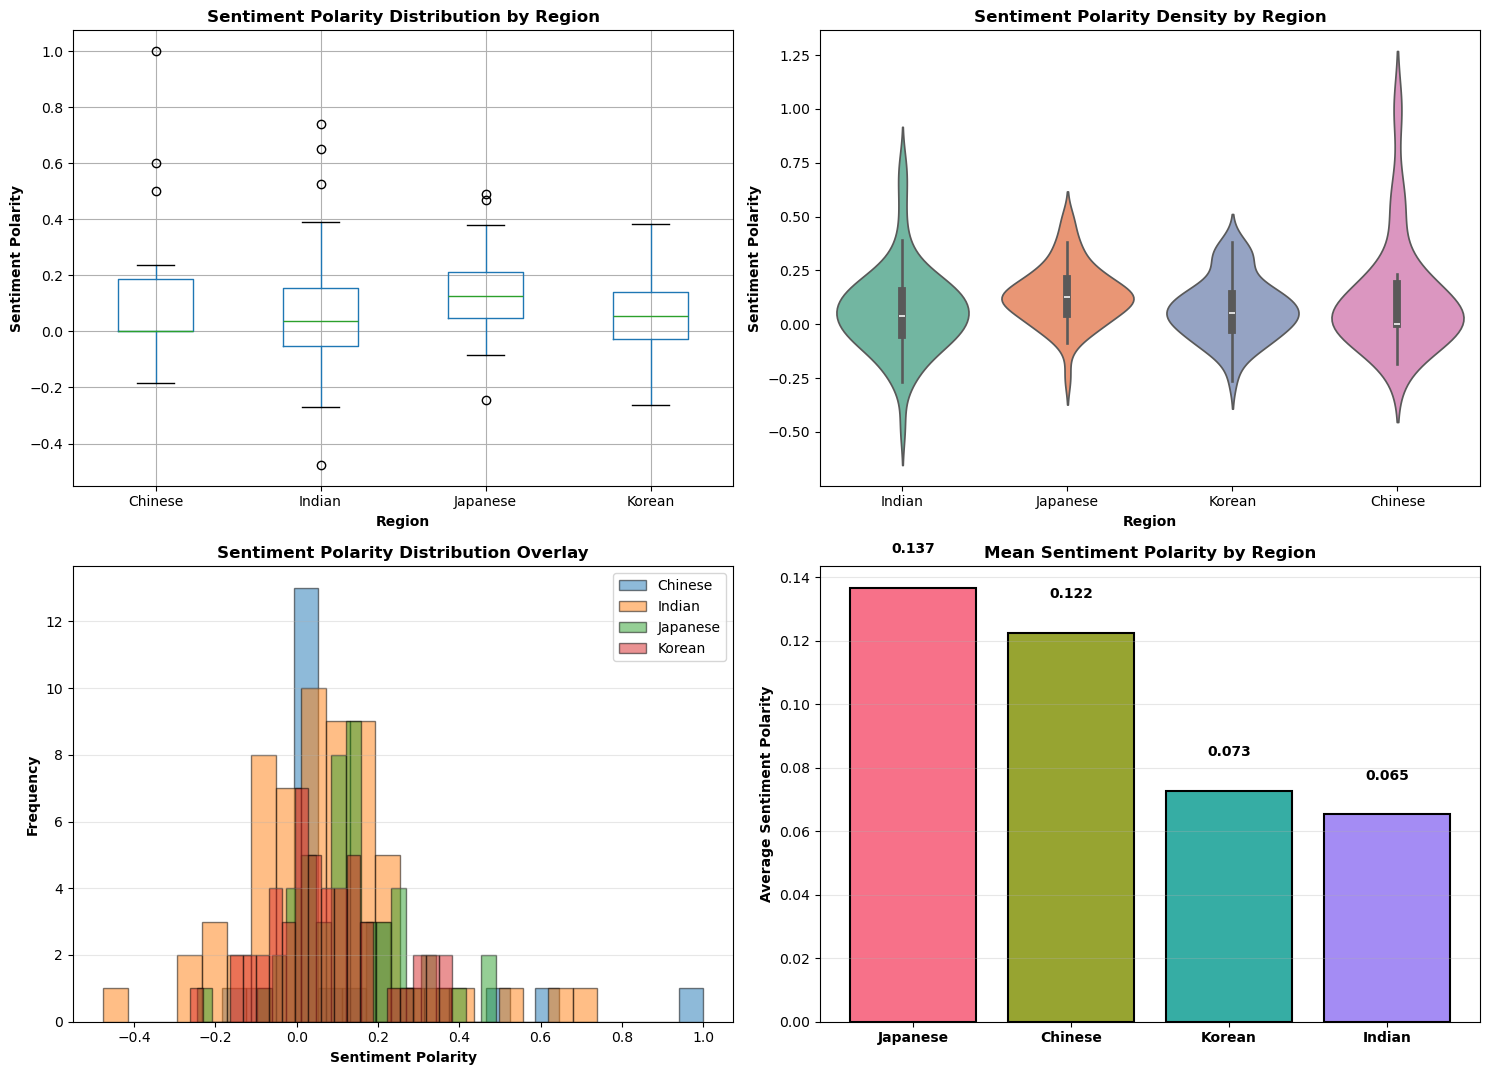

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load data
lyrics = pd.read_parquet("../data/asian_songs_translated_w_metadata_lyric_features.parquet")
print(lyrics.shape)
print(lyrics.info())

print("1. REGION DISTRIBUTION")

region_counts = lyrics['region_group'].value_counts()
print("\nRegion counts:")
print(region_counts)
print(f"\nBaseline accuracy: {region_counts.max() / len(lyrics) * 100:.1f}%")

# Graph
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = sns.color_palette("husl", len(region_counts))
axes[0].bar(region_counts.index, region_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Songs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Region', fontsize=12, fontweight='bold')
axes[0].set_title('Song Count by Region', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, (region, count) in enumerate(region_counts.items()):
    axes[0].text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

# Pie chart
wedges, texts, autotexts = axes[1].pie(region_counts.values, labels=region_counts.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[1].set_title('Proportion of Songs by Region', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('01_region_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


print("2. DURATION ANALYSIS")

lyrics['duration_sec'] = lyrics['duration_ms'] / 1000

print("\nDuration statistics by region:")
print(lyrics.groupby('region_group')['duration_sec'].describe().round(2))

# ANOVA test
groups = [group['duration_sec'].values for name, group in lyrics.groupby('region_group')]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA: F={f_stat:.4f}, p={p_value:.6f}")
print(f"Significant: {'YES ✓' if p_value < 0.05 else 'NO'}")

# Graph
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Box plot
lyrics.boxplot(column='duration_sec', by='region_group', ax=axes[0, 0])
axes[0, 0].set_title('Duration Distribution by Region', fontweight='bold')
axes[0, 0].set_xlabel('Region', fontweight='bold')
axes[0, 0].set_ylabel('Duration (seconds)', fontweight='bold')
axes[0, 0].get_figure().suptitle('')

# Violin plot
sns.violinplot(data=lyrics, x='region_group', y='duration_sec', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Duration Density by Region', fontweight='bold')

# Histogram
for region in sorted(lyrics['region_group'].unique()):
    region_data = lyrics[lyrics['region_group'] == region]['duration_sec']
    axes[1, 0].hist(region_data, alpha=0.5, label=region, bins=15, edgecolor='black')
axes[1, 0].set_title('Duration Distribution Overlay', fontweight='bold')
axes[1, 0].set_xlabel('Duration (seconds)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Mean duration
mean_duration = lyrics.groupby('region_group')['duration_sec'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(mean_duration)), mean_duration.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xticks(range(len(mean_duration)))
axes[1, 1].set_xticklabels(mean_duration.index, fontweight='bold')
axes[1, 1].set_ylabel('Average Duration (seconds)', fontweight='bold')
axes[1, 1].set_title('Mean Song Duration by Region', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (region, duration) in enumerate(mean_duration.items()):
    axes[1, 1].text(i, duration + 3, f'{duration:.0f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('02_duration_by_region.png', dpi=300, bbox_inches='tight')
plt.show()


print("3. AUDIO FEATURES")


audio_features = ['acousticness', 'energy', 'danceability', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

feature_means = lyrics.groupby('region_group')[audio_features].mean()
print("\nMean audio features by region:")
print(feature_means.round(3))

# Graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(feature_means.T, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5, 
            ax=ax, cbar_kws={'label': 'Mean Feature Value'}, linewidths=0.5)
ax.set_title('Mean Audio Features by Region', fontsize=13, fontweight='bold')
ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Audio Feature', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('03_audio_features_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


print("4. LANGUAGE DISTRIBUTION")


lang_by_region = pd.crosstab(lyrics['region_group'], lyrics['language'])
print("\nLanguage by region:")
print(lang_by_region)

# Graph
fig, ax = plt.subplots(figsize=(12, 6))
lang_by_region.plot(kind='bar', ax=ax, width=0.7, color=sns.color_palette("Set2", len(lang_by_region.columns)))
ax.set_title('Language Distribution by Region', fontsize=13, fontweight='bold')
ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Songs', fontsize=12, fontweight='bold')
ax.legend(title='Language', fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('04_language_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("5. TAG DISTRIBUTION BY REGION")
print("="*80)

print("\nTop 5 tags by region:")
for region in sorted(lyrics['region_group'].unique()):
    print(f"\n{region}:")
    region_tags = lyrics[lyrics['region_group'] == region]['tag'].value_counts().head(5)
    print(region_tags)

# Graph - stacked bar chart
tag_by_region = pd.crosstab(lyrics['region_group'], lyrics['tag'])
# Get top 10 tags overall
top_tags = lyrics['tag'].value_counts().head(10).index
tag_by_region_top = tag_by_region[top_tags]

fig, ax = plt.subplots(figsize=(14, 6))
tag_by_region_top.plot(kind='bar', ax=ax, width=0.8, stacked=False)
ax.set_title('Top 10 Tags by Region', fontsize=13, fontweight='bold')
ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Songs', fontsize=12, fontweight='bold')
ax.legend(title='Tag', fontsize=9, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('05_tag_by_region.png', dpi=300, bbox_inches='tight')
print(" Saved: 05_tag_by_region.png")
plt.show()


print("6. SENTIMENT POLARITY ANALYSIS")
sentiment_cols = [col for col in lyrics.columns if 'sentiment' in col.lower() and 'polarity' in col.lower()]
print(f"\nSentiment columns found: {sentiment_cols}")

if sentiment_cols:
    sentiment_col = sentiment_cols[0]
    print(f"Using column: '{sentiment_col}'")
    
    # Clean the column: remove whitespace and \r, convert to numeric
    print(f"\nCleaning sentiment column...")
    lyrics[sentiment_col] = lyrics[sentiment_col].astype(str).str.strip().str.replace('\r', '')
    lyrics[sentiment_col] = pd.to_numeric(lyrics[sentiment_col], errors='coerce')
    
    print(f"✓ Cleaned. Non-null values: {lyrics[sentiment_col].notna().sum()} / {len(lyrics)}")
    
    print(f"\nSentiment polarity statistics by region:")
    print(lyrics.groupby('region_group')[sentiment_col].describe().round(3))
    
    # ANOVA test for sentiment (only on non-null values)
    sentiment_groups = [group[sentiment_col].dropna().values for name, group in lyrics.groupby('region_group')]
    
    # Check if we have valid groups for ANOVA
    valid_groups = [g for g in sentiment_groups if len(g) > 0]
    if len(valid_groups) > 1 and all(len(g) > 0 for g in sentiment_groups):
        try:
            f_stat_sent, p_value_sent = stats.f_oneway(*sentiment_groups)
            print(f"\nANOVA for sentiment: F={f_stat_sent:.4f}, p={p_value_sent:.6f}")
            print(f"Significant: {'YES ✓' if p_value_sent < 0.05 else 'NO'}")
        except Exception as e:
            print(f"✗ ANOVA error: {e}")
    else:
        print("\n✗ Insufficient data for ANOVA")
    
    # Graph
    fig, axes = plt.subplots(2, 2, figsize=(15, 11))
    
    # Box plot
    lyrics.boxplot(column=sentiment_col, by='region_group', ax=axes[0, 0])
    axes[0, 0].set_title('Sentiment Polarity Distribution by Region', fontweight='bold')
    axes[0, 0].set_xlabel('Region', fontweight='bold')
    axes[0, 0].set_ylabel('Sentiment Polarity', fontweight='bold')
    axes[0, 0].get_figure().suptitle('')
    
    # Violin plot
    sns.violinplot(data=lyrics, x='region_group', y=sentiment_col, ax=axes[0, 1], palette='Set2')
    axes[0, 1].set_title('Sentiment Polarity Density by Region', fontweight='bold')
    axes[0, 1].set_xlabel('Region', fontweight='bold')
    axes[0, 1].set_ylabel('Sentiment Polarity', fontweight='bold')
    
    # Histogram
    for region in sorted(lyrics['region_group'].unique()):
        region_data = lyrics[lyrics['region_group'] == region][sentiment_col].dropna()
        if len(region_data) > 0:
            axes[1, 0].hist(region_data, alpha=0.5, label=region, bins=20, edgecolor='black')
    axes[1, 0].set_title('Sentiment Polarity Distribution Overlay', fontweight='bold')
    axes[1, 0].set_xlabel('Sentiment Polarity', fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Mean sentiment
    mean_sentiment = lyrics.groupby('region_group')[sentiment_col].mean().sort_values(ascending=False)
    axes[1, 1].bar(range(len(mean_sentiment)), mean_sentiment.values, color=colors, edgecolor='black', linewidth=1.5)
    axes[1, 1].set_xticks(range(len(mean_sentiment)))
    axes[1, 1].set_xticklabels(mean_sentiment.index, fontweight='bold')
    axes[1, 1].set_ylabel('Average Sentiment Polarity', fontweight='bold')
    axes[1, 1].set_title('Mean Sentiment Polarity by Region', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for i, (region, sentiment) in enumerate(mean_sentiment.items()):
        axes[1, 1].text(i, sentiment + 0.01, f'{sentiment:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('06_sentiment_polarity_by_region.png', dpi=300, bbox_inches='tight')
    print(" Saved: 06_sentiment_polarity_by_region.png")
    plt.show()
else:
    print("\n No sentiment polarity column found")
    print("Available columns:", lyrics.columns.tolist())
